# NBA 2k Player Rank Analysis

Can we predict player ranking while understanding what factors lead to each ranking?

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/nba2k20-full.csv')

In [3]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB


In [5]:
df['jersey'] = df['jersey'].apply(lambda x: x.split('#')[1]).apply(int)
df['position'] = df['position'].apply(lambda x: x.split('-')[0])
df['b_day'] = pd.to_datetime(df['b_day'])
df['height_feet'] = df['height'].apply(lambda x: x.split('-')[0]).apply(int)
df['height_inches'] = df['height'].apply(lambda x: x.split('-')[1]).apply(lambda x: x.split()[0]).apply(int)
df['weight'] = df['weight'].apply(lambda x: x.split()[0]).apply(int)
df['salary'] = df['salary'].apply(lambda x: x.replace('$', '')).apply(int)

In [6]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,height_feet,height_inches
0,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250,37436858,USA,2003,1,1,NaN,6,9
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225,32742000,USA,2011,1,15,San Diego State,6,7
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F,1994-12-06,6-11 / 2.11,242,25842697,Greece,2013,1,15,NaN,6,11
3,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230,37199000,USA,2007,1,2,Texas,6,10
4,James Harden,96,13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220,38199000,USA,2009,1,3,Arizona State,6,5


In [7]:
def heighter(height):
    if height == 5:
        return 5 * 12
    elif height == 6:
        return 6 * 12
    elif height == 7:
        return 7 * 12
    else:
        return 'doubt it'

In [8]:
df['height_feet_inches'] = df['height_feet'].apply(heighter)
df['height'] = df['height_feet_inches'] + df['height_inches']
df.drop(['height_feet', 'height_inches', 'height_feet_inches'], axis=1, inplace=True)

In [9]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,81,250,37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,1991-06-29,79,225,32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F,1994-12-06,83,242,25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,82,230,37199000,USA,2007,1,2,Texas
4,James Harden,96,13,Houston Rockets,G,1989-08-26,77,220,38199000,USA,2009,1,3,Arizona State


In [10]:
import numpy as np
now = pd.Timestamp('now')
df['b_day'] = df['b_day'].where(df['b_day'] < now, df['b_day'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['b_day']).astype('<m8[Y]') 
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,age
0,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,81,250,37436858,USA,2003,1,1,NaN,35.0
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,1991-06-29,79,225,32742000,USA,2011,1,15,San Diego State,29.0
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F,1994-12-06,83,242,25842697,Greece,2013,1,15,NaN,25.0
3,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,82,230,37199000,USA,2007,1,2,Texas,31.0
4,James Harden,96,13,Houston Rockets,G,1989-08-26,77,220,38199000,USA,2009,1,3,Arizona State,31.0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

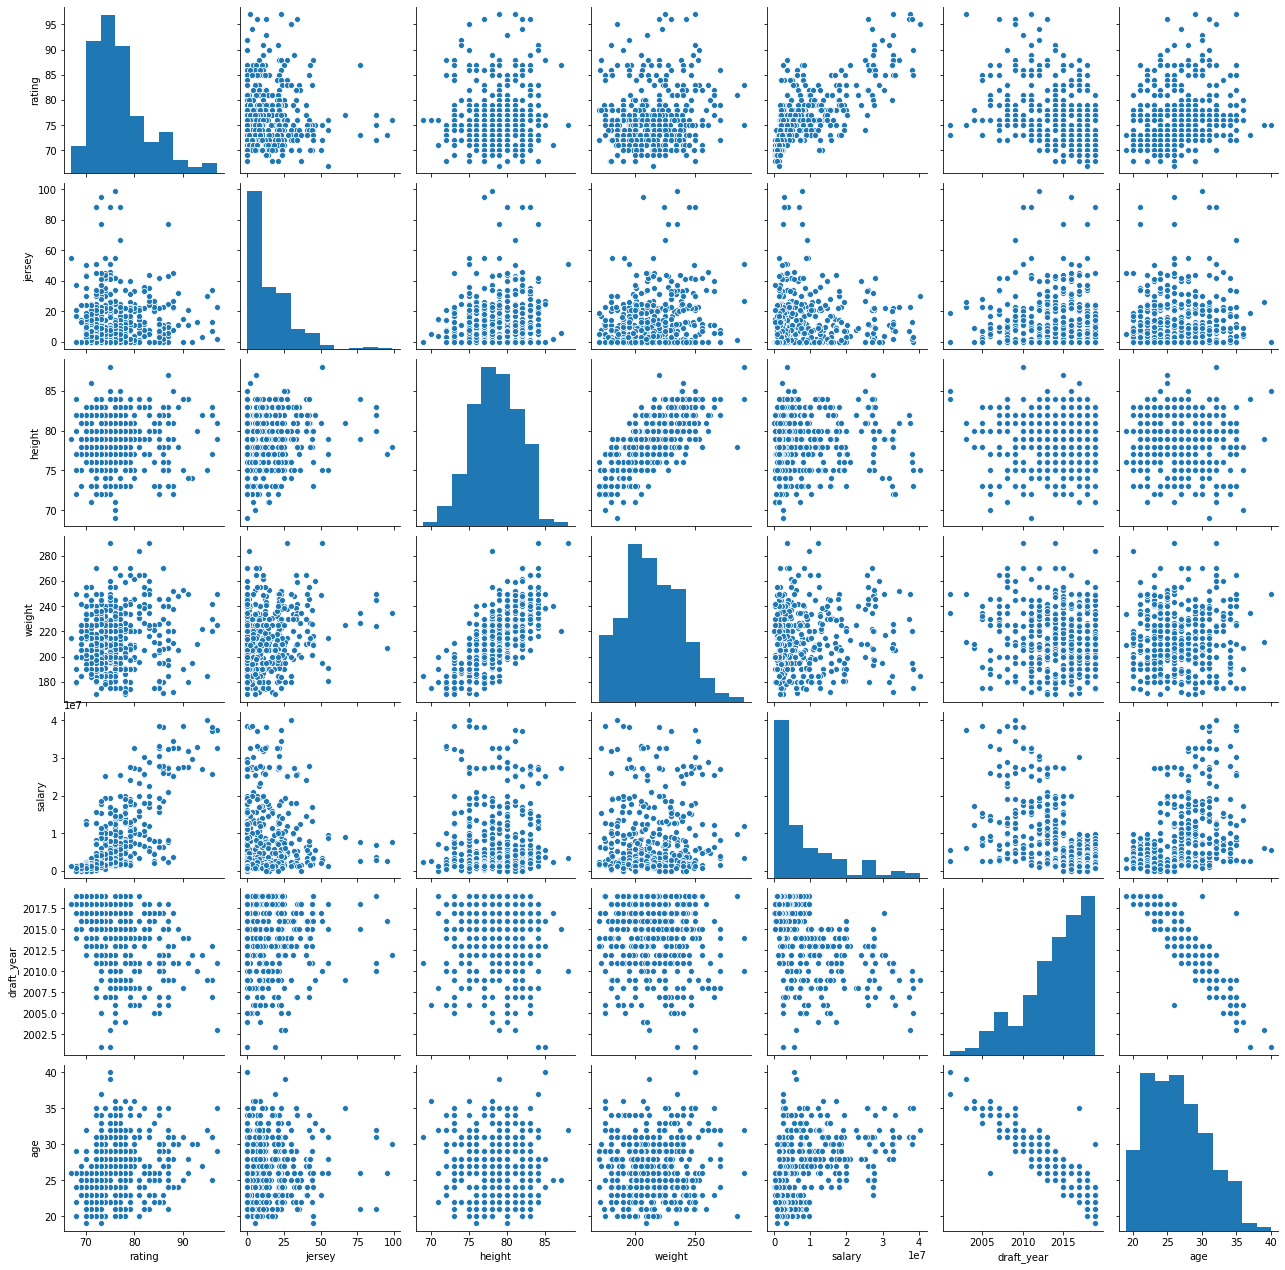

In [12]:
sns.pairplot(df)

In [13]:
teams = pd.read_html('http://www.stadium-maps.com/facts/nba-teams-popularity.html')[0]
teams2 = pd.Series(df['team'].sort_values().unique())

In [14]:
pd.concat([teams2, teams['NBA Team']], axis=1)

,0,NBA Team
0,Atlanta Hawks,Golden State Warriors
1,Boston Celtics,LA Lakers
2,Brooklyn Nets,Cleveland Cavaliers
3,Charlotte Hornets,Chicago Bulls
4,Chicago Bulls,Oklahoma City Thunder
5,Cleveland Cavaliers,Boston Celtics
6,Dallas Mavericks,Houston Rockets
7,Denver Nuggets,Miami Heat
8,Detroit Pistons,San Antonio Spurs
9,Golden State Warriors,Toronto Raptors


In [15]:
def angelino(team):
    if team == 'LA Lakers':
        return 'Los Angeles Lakers'
    elif team == 'LA Clippers':
        return 'Los Angeles Clippers'
    else:
        return team

In [16]:
teams['NBA Team'] = teams['NBA Team'].apply(angelino)

In [17]:
df = pd.merge(df, teams, left_on='team', right_on='NBA Team')

In [18]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,age,#,NBA Team,Instagram Followers,Championships
0,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,81,250,37436858,USA,2003,1,1,NaN,35.0,2,Los Angeles Lakers,8300000,16
1,Anthony Davis,94,3,Los Angeles Lakers,F,1993-03-11,82,222,27093019,USA,2012,1,1,Kentucky,27.0,2,Los Angeles Lakers,8300000,16
2,Kyle Kuzma,84,0,Los Angeles Lakers,F,1995-07-24,80,221,1974600,USA,2017,1,27,Utah,25.0,2,Los Angeles Lakers,8300000,16
3,JaVale McGee,79,7,Los Angeles Lakers,C,1988-01-19,84,270,4000000,USA,2008,1,18,Nevada,32.0,2,Los Angeles Lakers,8300000,16
4,Danny Green,77,14,Los Angeles Lakers,G,1987-06-22,78,209,14634147,USA,2009,2,46,North Carolina,33.0,2,Los Angeles Lakers,8300000,16


In [19]:
df.drop(['NBA Team'], axis=1, inplace=True)

In [20]:
df.rename({'Instagram Followers': 'team_ig_followers',
           'Championships': 'team_chips'}, axis=1, inplace=True)

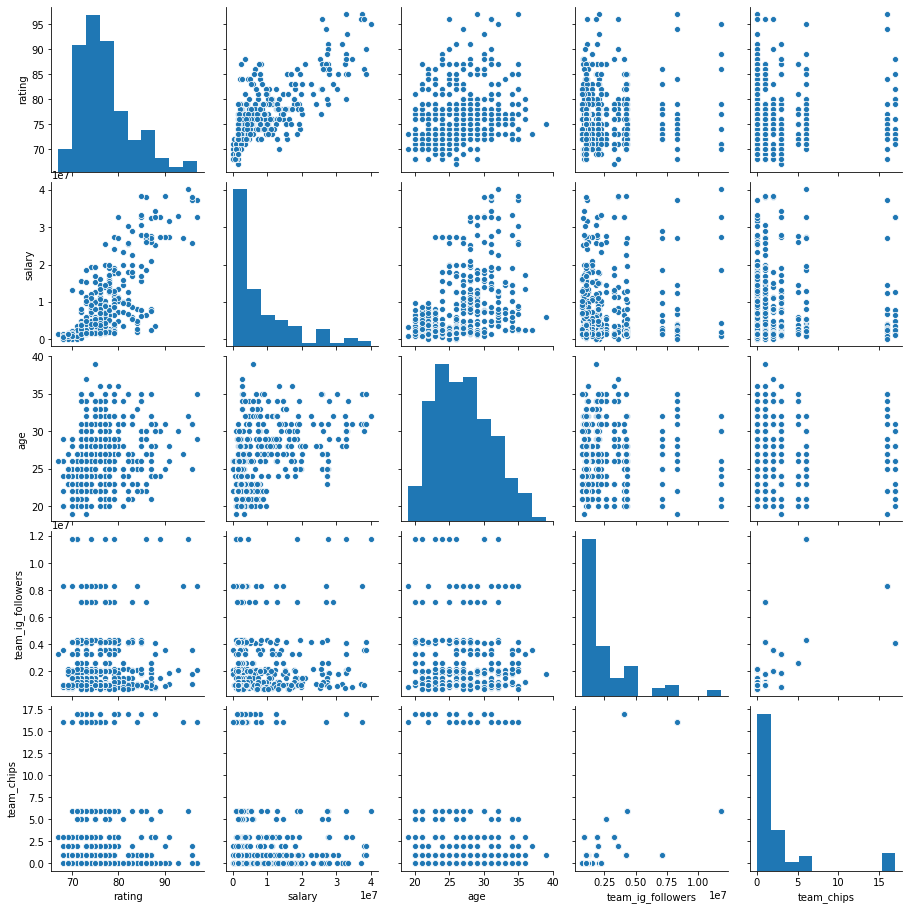

In [21]:
sns.pairplot(df[['rating', 'salary', 'age', 'team_ig_followers', 'team_chips']])

In [22]:
df.columns

Index(['full_name', 'rating', 'jersey', 'team', 'position', 'b_day', 'height',
       'weight', 'salary', 'country', 'draft_year', 'draft_round',
       'draft_peak', 'college', 'age', '#', 'team_ig_followers', 'team_chips'],
      dtype='object')

In [23]:
X = df[['team', 'position', 'height', 'weight', 'salary', 'country', 'draft_round', 'draft_year', 'age', 'team_ig_followers', 'team_chips']]
y = df['rating']

In [24]:
X = pd.get_dummies(X)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
from sklearn.pipeline import make_pipeline

In [33]:
lr = LinearRegression()
es = ElasticNet()
la = Lasso()
sv = SVR()
kn = KNeighborsRegressor()
rf = RandomForestRegressor()

In [52]:
models = [lr, es, la, sv, kn, rf]
for model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f'{model}: {mean_squared_error(y_test, preds)}')

LinearRegression(): 14.221208868213816
ElasticNet(): 12.928291311000558
Lasso(): 12.822630474436322
SVR(): 15.120892668281737
KNeighborsRegressor(): 14.586870229007635
RandomForestRegressor(): 13.172186259541984


In [53]:
from sklearn.model_selection import GridSearchCV

In [60]:
la = Lasso(random_state=1)
grid_values = {'alpha': [0.1, 0.5, 1, 1.5, 2], 'max_iter': [100, 500, 1000, 2000]}
la_grid = GridSearchCV(la, param_grid=grid_values)
la_grid.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(random_state=1),
             param_grid={'alpha': [0.1, 0.5, 1, 1.5, 2],
                         'max_iter': [100, 500, 1000, 2000]})

In [62]:
preds = la_grid.predict(X_test)

In [63]:
mean_squared_error(y_test, preds)

12.804348706735912